# Problem Statement
You will use a neural network to recognize two handwritten digits, zero and one .
This is a binary classification task. Automated handwritten digit recognition is widely used today - from recognizing zip codes (postal codes) on mail envelopes to recognizing amounts written on bank checks.

**Importing Modules**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from loadData import *

**Load Data**

In [4]:
X , y = load_data()

### 2.2 Dataset



- The data set contains 1000 training examples of handwritten digits $^1$, here limited to zero and one.  

    - Each training example is a 20-pixel x 20-pixel grayscale image of the digit. 
        - Each pixel is represented by a floating-point number indicating the grayscale intensity at that location. 
        - The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional vector. 
        - Each training example becomes a single row in our data matrix `X`. 
        - This gives us a 1000 x 400 matrix `X` where every row is a training example of a handwritten digit image.

$$X = 
\left(\begin{array}{cc} 
--- (x^{(1)}) --- \\
--- (x^{(2)}) --- \\
\vdots \\ 
--- (x^{(m)}) --- 
\end{array}\right)$$ 

- The second part of the training set is a 1000 x 1 dimensional vector `y` that contains labels for the training set
    - `y = 0` if the image is of the digit `0`, `y = 1` if the image is of the digit `1`.

$^1$<sub> This is a subset of the MNIST handwritten digit dataset (http://yann.lecun.com/exdb/mnist/)</sub>

In [8]:
print(F"Dimentions of X is: {X.shape}")
print(F"Dimentions of y is: {y.shape}")

Dimentions of X is: (1000, 400)
Dimentions of y is: (1000, 1)


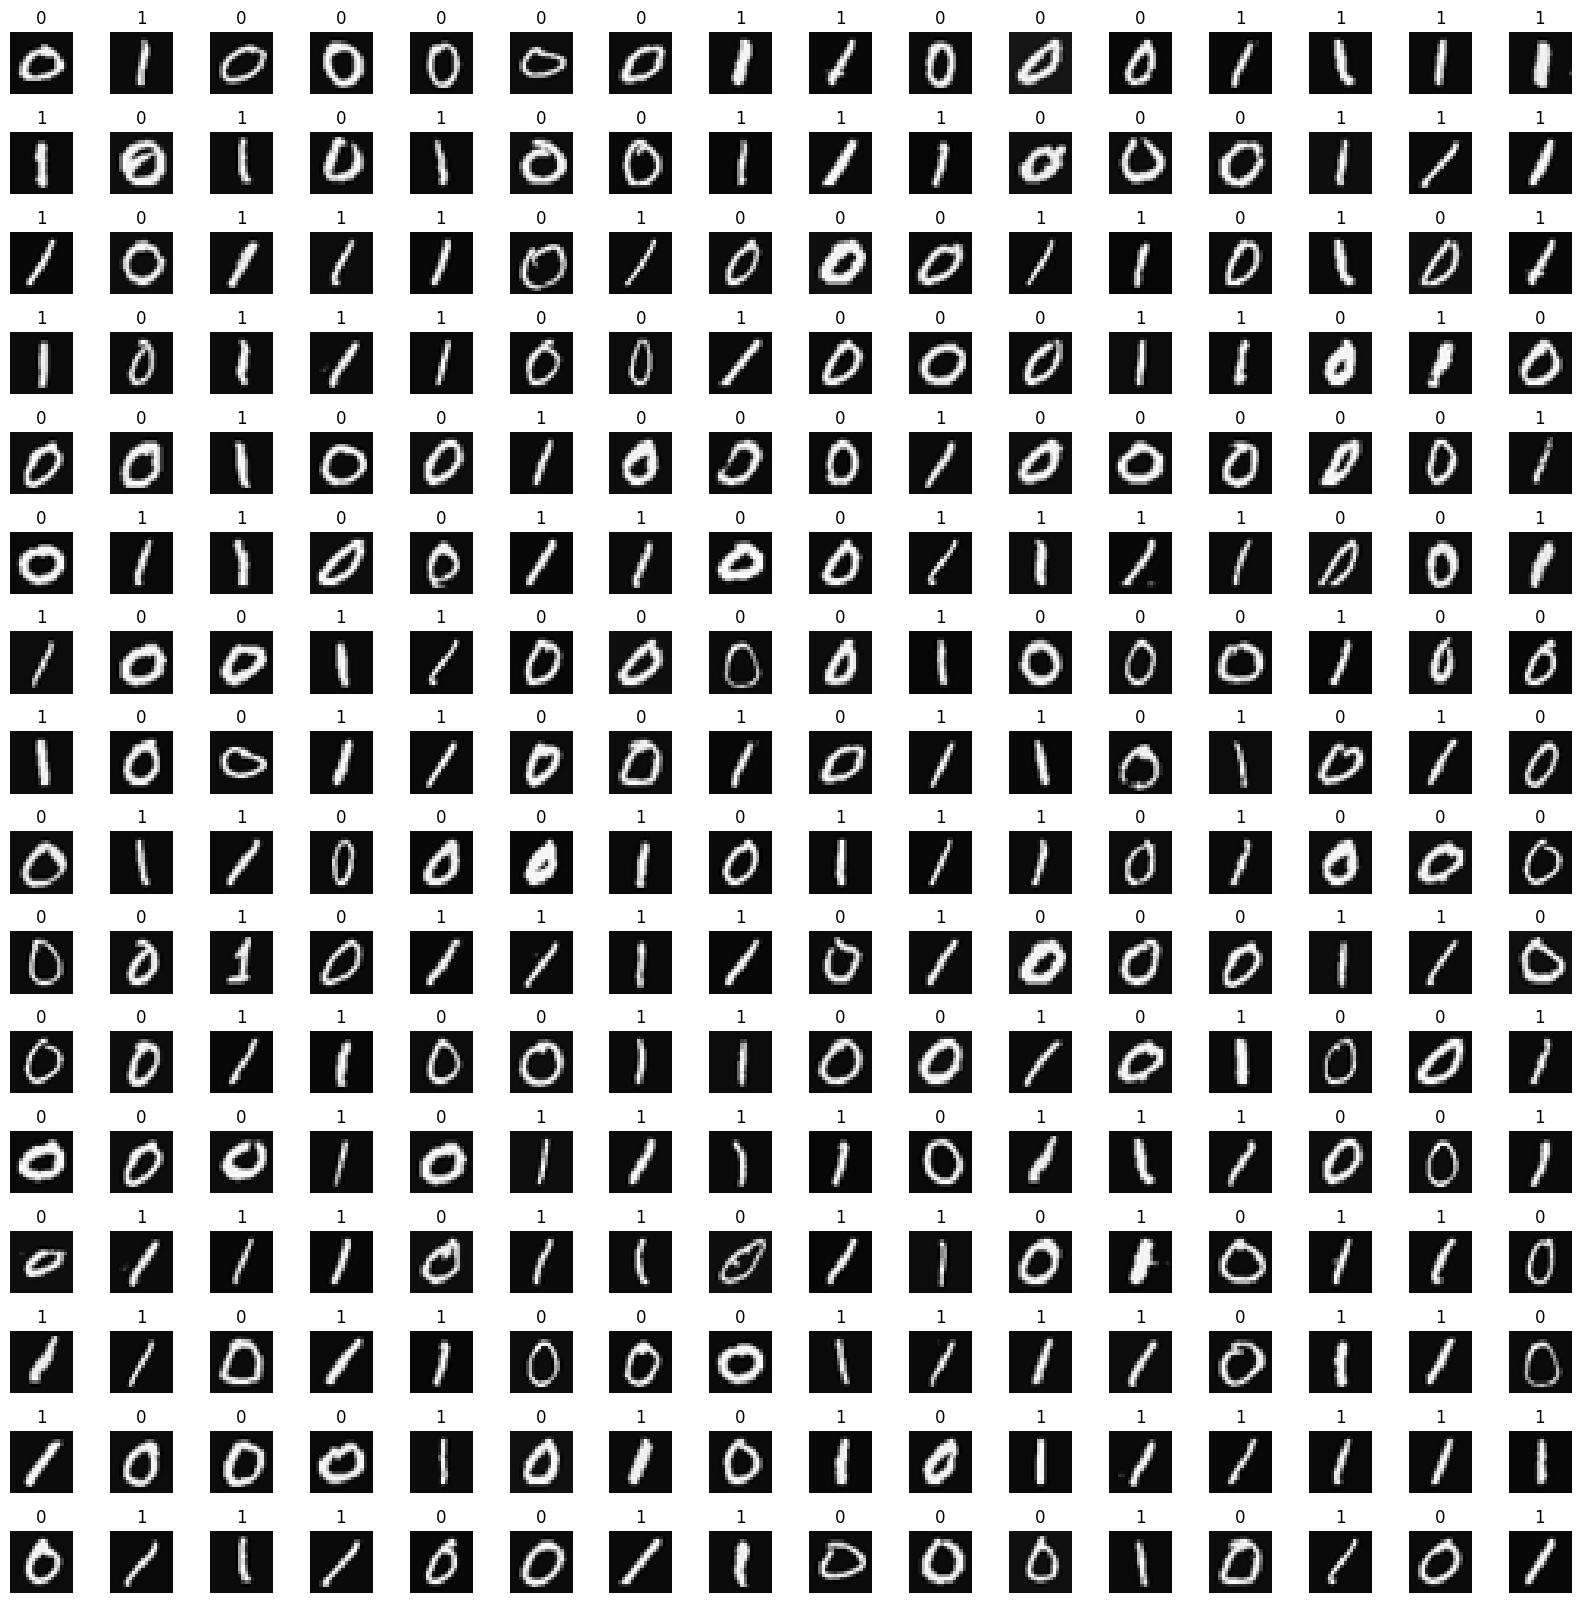

In [12]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
m, n = X.shape

fig, axes = plt.subplots(16,16, figsize=(16,16))
fig.tight_layout(pad=0.1)



for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    ax.imshow(X_random_reshaped, cmap='gray')
    
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

## Model Represenatation

- **Layer 1** has 25 units
- **Layer 2** has 15 units
- **Layer 3** has 1 units

  ## Shape of parameters W and b

   - Layer 1
      - input elements = 400 , output elements = 25 . Hence shape of W is (400 , 25)
      - shape of b is (25 , 1)
    - Layer 2
      - input elements = 25 , output elements  =  15 . Hence shape of W is (25 , 15)
      - shape of b is (15 , 1)
    - Layer 3
      - input elements = 15 , output elements = 1 . Hence shape of W is (15 , 1)
      - shape of b is (1 , 1)

In [17]:
model = Sequential(
    [
    tf.keras.Input(shape=(400 , )), #specify input size
    Dense(units = 25 , activation = "sigmoid" , name = "layer_1"),
    Dense(units = 15 , activation = "sigmoid" , name = "layer_2"),
    Dense(units = 1 , activation = "sigmoid" , name = "layer_3")
    ] , name = "neural_network_model"
)

In [18]:
model.summary()

Model: "neural_network_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ layer_1 (Dense)                      │ (None, 25)                  │          10,025 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_2 (Dense)                      │ (None, 15)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_3 (Dense)                      │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,431 (40.75 KB)

 Trainable params: 10,431 (40.75 KB)

 Non-trainable params: 0 (0.00 B)

### Code explanation
 ``` python
         tf.keras.Input(shape=(400 , )),


### Parameters

In [19]:
W1 , b1 = model.get_layer("layer_1").get_weights()
W2 , b2 = model.get_layer("layer_2").get_weights()
W3 , b3 = model.get_layer("layer_3").get_weights()

In [20]:
print(f"W1 shape :- {W1.shape}  b1 shape {b1.shape}")
print(f"W2 shape :- {W2.shape}  b2 shape {b2.shape}")
print(f"W3 shape :- {W3.shape}  b3 shape {b3.shape}")

W1 shape :- (400, 25)  b1 shape (25,)
W2 shape :- (25, 15)  b2 shape (15,)
W3 shape :- (15, 1)  b3 shape (1,)


**The following code run gradient descent and define loss function to fit weight of the model to the traning data .**

In [21]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X,y,
    epochs=20
)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6470
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4901
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3237
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2111
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1459
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1116
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0902
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0709
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0614
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0521
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0446
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0414
Epoch 13/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0355
Epoch 14/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0319
Epoch 15/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0309
Epoch 16/20
32/32 ━

# Prediction

In [27]:
prediction = model.predict(X[500].reshape(1,400))

if prediction >= 0.5 :
    yhat = 1
else : 
    yhat = 0

print(f"prediction of the number is: {yhat}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
prediction of the number is: 1
